In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import qutip as qt
import qutip

# -- References to Relevant Papers --
# "Entanglement-enhanced quantum metrology: From standard quantum limit to Heisenberg limit" (Huang et al.)
#

##I worked with this: Phase stimation by interferometry as of figure 2b (page 4) implemented with One axis Twisting (OAT), page 10-12.


In [2]:
# Parameters for preparation, sensing, and measurement times
T_total = 1.0  # Total fixed time for the experiment

# Fraction of time allocated for preparation and measurement
tau_prep_fraction = 0.1  # Fraction of time spent on preparation
tau_meas_fraction = 0.05  # Fraction of time spent on measurement
tau_sense_fraction = 1 - tau_prep_fraction - tau_meas_fraction  # Remaining time for sensing

def generate_coherent_state(j):
    """
    Generate a coherent spin state aligned along the x-axis.

    Based on the description of coherent states for metrology in Pezzé & Smerzi, Section III. [41†source].
    
    Parameters:
        j (float): Total spin quantum number (N/2).
    
    Returns:
        Qobj: Coherent spin state.
    """
    theta = np.pi / 2  # Aligned along the x-axis
    phi = 0  # No rotation around the z-axis
    return qt.spin_coherent(j, theta, phi)

def gen_css(j,theta,phi):
    return qt.spin_coherent(j, theta, phi)

def apply_squeezing_operator(squeezing_strength, J):
    """
    Apply a squeezing operator to the coherent state.

    The use of squeezing to improve phase sensitivity is discussed in Hayes et al., Section 2.2. [42†source].
    
    Parameters:
        j (float): Total spin quantum number.
        squeezing_strength (float): The strength of squeezing.
        Jy (Qobj): Spin operator along the z?-axis.
    
    Returns:
        Qobj: Squeezing operator.
    """
    squeezing_operator = (-1j * squeezing_strength * J**2).expm()
    return squeezing_operator

def time_evolve_state(H, state, t):
    """
    Perform time evolution of a quantum state under a Hamiltonian H for time t.

    Time evolution based on the Hamiltonian dynamics as outlined in Pezzé et al., Phys. Rev. A, 2020. Section II [41†source].
    
    Parameters:
        H (Qobj): Hamiltonian of the system.
        state (Qobj): Initial quantum state.
        t (float): Time of evolution.
    
    Returns:
        Qobj: Evolved quantum state after time t.
    """
    U = (-1j * H * t).expm()  # Time evolution operator U = exp(-i H t)
    return U * state

def measure_phase_variance(operator, state):
    """
    Measure the phase variance of the given state.

    Fisher Information and phase variance calculations are fundamental to quantum metrology, as discussed in Pezzé et al., Section III. [42†source].
    
    Parameters:
        operator (Qobj): Spin operator (typically Jz).
        state (Qobj): Quantum state (coherent or squeezed).
    
    Returns:
        float: Phase variance of the state.
    """
    return qt.variance(operator, state)

def calculate_fisher_information(N, sensing_time, is_entangled):
    """
    Calculate Fisher Information for both separable (SQL) and entangled (HL) states.

    This formula for Fisher Information scaling is adapted from Pezzé et al., Rev. Mod. Phys., 2018, page 6 [42†source].
    
    Parameters:
        N (int): Number of particles.
        sensing_time (float): The time spent in sensing.
        is_entangled (bool): If True, apply Heisenberg scaling for entangled states.
    
    Returns:
        float: Fisher Information.
    """
    if is_entangled:
        return N**2 * sensing_time**2  # Heisenberg scaling
    else:
        return N * sensing_time**2  # Standard Quantum Limit scaling

def calculate_r_value(F_sep, F_ent, total_time_sep, total_time_ent):
    """
    Calculate the metrological gain r, comparing separable and entangled strategies.

    This calculation is adapted from "Entanglement-enhanced quantum metrology", Section II. [42†source].
    
    Parameters:
        F_sep (float): Fisher Information for separable states.
        F_ent (float): Fisher Information for entangled states.
        total_time_sep (float): Total time for separable strategy.
        total_time_ent (float): Total time for entangled strategy.
    
    Returns:
        float: Metrological gain r.
    """
    return (F_ent / total_time_ent) / (F_sep / total_time_sep)



In [28]:
css6 = generate_coherent_state(20)

squeezing_strength1 = 0.1
Sz = qt.jmat(20, 'z')
Sx = qt.jmat(20, 'x')
squeezing_operator1 = apply_squeezing_operator(squeezing_strength1, Sz)
sqz6 = squeezing_operator1 * css6

squeezing_strength2 = 0.4 
squeezing_operator2 = apply_squeezing_operator(squeezing_strength2, Sz)
sqz6b = squeezing_operator2 * css6

print(qt.variance(Sx,css6),qt.variance(Sx,sqz6),qt.variance(Sx,sqz6b))
print(qt.variance(Sz,css6),qt.variance(Sz,sqz6),qt.variance(Sz,sqz6b))

0.0 25.08280187535013 204.34473931154795
9.999999999999995 9.999999999999993 9.999999999999995


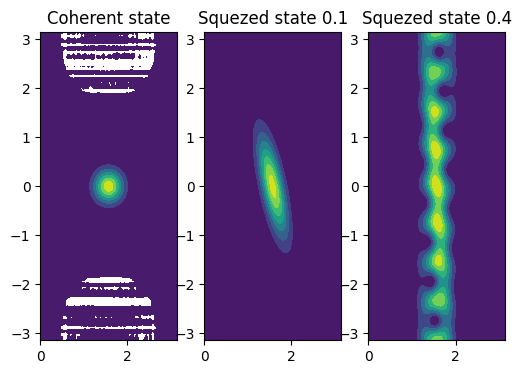

In [29]:
thetavec = np.linspace(0, np.pi, 100)
phivec = np.linspace(-np.pi,np.pi, 100)
fcss6,theta,phi = qt.spin_q_function(css6,thetavec,phivec)
fsqz6,theta1,phi1 = qt.spin_q_function(sqz6,thetavec,phivec)
fsqz6b,theta2,phi2 = qt.spin_q_function(sqz6b,thetavec,phivec)

fig,axes = plt.subplots(1,3,figsize=(6,4))
cont0 = axes[0].contourf(theta,phi,fcss6)
lbl0 = axes[0].set_title("Coherent state")

cont1 = axes[1].contourf(theta1, phi1,fsqz6)
lbl1 = axes[1].set_title("Squezed state 0.1")#

cont2 = axes[2].contourf(theta2, phi2,fsqz6b)
lbl2 = axes[2].set_title("Squezed state 0.4")#

#In [59]: cont0 = axes[2].contourf(xvec, xvec, Q_fock, 100)

#In [60]: lbl2 = axes[2].set_title("Fock state")"""

plt.show()

One axis twisting, aligned with the standard axes

In [69]:

for N in range (40,41):

    Sx = qt.jmat(N/2, 'x')
    Sy = qt.jmat(N/2, 'y')
    Sz = qt.jmat(N/2, 'z')


    mu = (24)**(1/6)*(N/2)**(-2/3)
    A = 1-np.cos(mu)**(N-2)
    B = 4*np.sin(mu/2)*np.cos(mu/2)**(N-2)
    delta = (1/2)*np.arctan(B/A)
    #delta2 = np.pi-(1/2)*np.arccos(-A/np.sqrt(A**2+B**2))
    #delta3 = 1/2*np.arctan(4/N*mu)
    squeezing_strength = mu/2
    #delta=mu
    
    print("mu:", mu, "  delta_opt:", delta, "Var min: ",(1/2)*(N/6)**(1/3), N/4*(1+(N-1)/4*(A-(A**2+B**2)**(1/2))))
    #print("mu:",  (12)**(1/6)*(N/2)**(-2/3)," nu_opt: ",(1/2)*np.arctan(N**(-1/3)))


    css_x = generate_coherent_state(N/2)

    print(qt.variance(Sy,css_x),qt.variance(Sz,css_x))

    squeezing_strength1 = mu/2
    rot_spin_oper = (1j * delta  *Sx).expm()*Sz* (-1j * delta  *Sx).expm()
    squeezing_operator =apply_squeezing_operator(squeezing_strength1,rot_spin_oper)
    sqz_rot = squeezing_operator * css_x
    print(N,delta,qt.variance(Sy,sqz_rot),qt.variance(Sz,sqz_rot))

mu: 0.2305058100333494   delta_opt: 0.2548905343827575 Var min:  0.9410360288810284 0.9258195409991143
10.000000000000016 9.999999999999995
40 0.2548905343827575 143.65924937226455 0.925819540999102


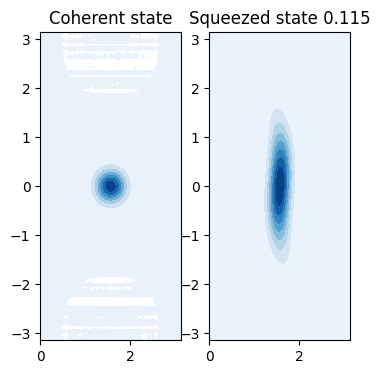

In [71]:
rot_spin_oper = (1j * delta  *Sx).expm()*Sz* (-1j * delta  *Sx).expm()
squeezing_operator =apply_squeezing_operator(squeezing_strength1,rot_spin_oper)
sqz_rot = squeezing_operator * css_x

thetavec = np.linspace(0, np.pi, 100)
phivec = np.linspace(-np.pi,np.pi, 100)
fcssx,theta,phi = qt.spin_q_function(css_x,thetavec,phivec)
fsqzrot,theta1,phi1 = qt.spin_q_function(sqz_rot,thetavec,phivec)

fig,axes = plt.subplots(1,2,figsize=(4,4))
cont0 = axes[0].contourf(theta,phi,fcssx,cmap=cm.Blues)
lbl0 = axes[0].set_title("Coherent state")

cont1 = axes[1].contourf(theta1, phi1,fsqzrot,cmap=cm.Blues)
lbl1 = axes[1].set_title("Squeezed state 0.115")#

plt.show()

In [ ]:
N = 100
j = N / 2  # Total spin quantum number
        
# Define collective spin operators
Sx = qt.jmat(j, 'x')
Sy = qt.jmat(j, 'y')
Sz = qt.jmat(j, 'z')

# Separable (SQL) Strategy
css_z = gen_css(j,0,0) #initial state in north pole
      
H_sense = Sz  # Sensing Hamiltonian
time=1.57 #for instance
beam_spl_css = (1j * np.pi/2  *Sx).expm()*css_z
evolved_css = time_evolve_state(H_sense, beam_spl_css, time)
final_css = (1j * np.pi/2  *Sx).expm()*evolved_css
        #Description of what is done in Fig 2b

expected_value_sql = qt.expect(Sz,final_css)/N
phase_var_sql = qt.variance(Sz, final_css)/N**2
#phase_variance_sql.append(phase_var_sql/N**2) 
#Since we stimate N*phase, to get the variance in theta estimation we have to divide by N**2
        
        

# Entangled (HL) Strategy. One axis twisting version. squeezing in y
mu = (24)**(1/6)*(N/2)**(-2/3)
A = 1-np.cos(mu)**(N-2)
B = 4*np.sin(mu/2)*np.cos(mu/2)**(N-2)
delta = (1/2)*np.arctan(B/A)
  
squeezing_strength = mu/2

rot_spin_oper = (1j * delta  *Sz).expm()*Sx* (-1j * delta  *Sz).expm()
squeezing_operator =apply_squeezing_operator(squeezing_strength,rot_spin_oper)
sss = squeezing_operator * css_z
beam_spl_sss = (1j * np.pi/2  *Sx).expm()*sss
evolved_sss = time_evolve_state(H_sense, beam_spl_sss, time)
final_sss = (1j * np.pi/2  *Sx).expm()*evolved_sss
expected_value_hl = qt.expect(Sz,final_sss)/N
phase_var_hl = qt.variance(Sz, final_sss)/N**2

thetavec = np.linspace(0, np.pi, 100)
phivec = np.linspace(0,2*np.pi, 100)
initialcss,theta,phi = qt.spin_q_function(css_z,thetavec,phivec)
beamcss,theta1,phi1 = qt.spin_q_function(beam_spl_css,thetavec,phivec)
evolvecss,theta2,phi2 = qt.spin_q_function(evolved_css,thetavec,phivec)
finalcss,theta3,phi3 = qt.spin_q_function(final_css,thetavec,phivec)

initialsss,theta4,phi4 = qt.spin_q_function(sss,thetavec,phivec)
beamsss,theta5,phi5 = qt.spin_q_function(beam_spl_sss,thetavec,phivec)
evolvesss,theta6,phi6 = qt.spin_q_function(evolved_sss,thetavec,phivec)
finalsss,theta7,phi7 = qt.spin_q_function(final_sss,thetavec,phivec)

fig,axes = plt.subplots(2,4,figsize=(8,8))
cont0 = axes[0,0].contourf(theta,phi,initialcss)
lbl0 = axes[0,0].set_title("Initial Coherent state")

cont1 = axes[0,1].contourf(theta1, phi1,beamcss)
lbl1 = axes[0,1].set_title("After beam splitter")#

cont2 = axes[0,2].contourf(theta2, phi2,evolvecss)
lbl2 = axes[0,2].set_title("After evolution")#

cont3 = axes[0,3].contourf(theta3, phi3,finalcss)
lbl3 = axes[0,3].set_title("Final state")#

cont4 = axes[1,0].contourf(theta4,phi4,initialsss)
lbl4 = axes[1,0].set_title("Initial Squeezed state (y)")

cont5 = axes[1,1].contourf(theta5, phi5,beamsss)
lbl5 = axes[1,1].set_title("After beam splitter")#

cont6 = axes[1,2].contourf(theta6, phi6,evolvesss)
lbl6 = axes[1,2].set_title("After evolution")#

cont7 = axes[1,3].contourf(theta7, phi7,finalsss)
lbl7 = axes[1,3].set_title("Final state")#

plt.show()

print("CSS. Estimated half cos:",expected_value_sql,"   SQL variance:", phase_var_sql)
print("Sqz. Estimated half cos:",expected_value_hl,"   HL variance:", phase_var_hl)


In [109]:
for N in range(1,50):
    j = N / 2  # Total spin quantum number
        
    # Define collective spin operators
    Sx = qt.jmat(j, 'x')
    Sy = qt.jmat(j, 'y')
    Sz = qt.jmat(j, 'z')

    # Separable (SQL) Strategy
    css_z = gen_css(j,0,0) #initial state in north pole
      
    H_sense = Sz  # Sensing Hamiltonian
    time=1.57 #for instance
    beam_spl_css = (1j * np.pi/2  *Sx).expm()*css_z
    evolved_css = time_evolve_state(H_sense, beam_spl_css, time)
    final_css = (1j * np.pi/2  *Sx).expm()*evolved_css
        #Description of what is done in Fig 2b

    expected_value_sql = qt.expect(Sz,final_css)/N
    phase_var_sql = qt.variance(Sz, final_css)/N**2
    print(N, expected_value_sql, phase_var_sql, phase_var_sql*N)

1 -0.0003981633553665487 0.24999984146594234 0.24999984146594234
2 -0.0003981633553664654 0.12499992073297116 0.2499998414659423
3 -0.00039816335536668745 0.08333328048864747 0.2499998414659424
4 -0.00039816335536661807 0.06249996036648566 0.24999984146594265
5 -0.0003981633553667513 0.049999968293188486 0.24999984146594242
6 -0.00039816335536658684 0.041666640244323754 0.2499998414659425
7 -0.0003981633553666245 0.03571426306656321 0.24999984146594245
8 -0.00039816335536672735 0.0312499801832428 0.2499998414659424
9 -0.0003981633553665801 0.02777776016288251 0.24999984146594262
10 -0.00039816335536662734 0.024999984146594215 0.24999984146594215
11 -0.0003981633553666644 0.022727258315085683 0.2499998414659425
12 -0.000398163355366754 0.020833320122161846 0.24999984146594215
13 -0.0003981633553666259 0.019230757035841747 0.24999984146594273
14 -0.00039816335536660733 0.017857131533281622 0.2499998414659427
15 -0.0003981633553666577 0.016666656097729497 0.24999984146594245
16 -0.0003981

In [ ]:
Squeezing, scheme proposed by J. Ma et al. Physics reports 509 (2011), page 123, formula (283)

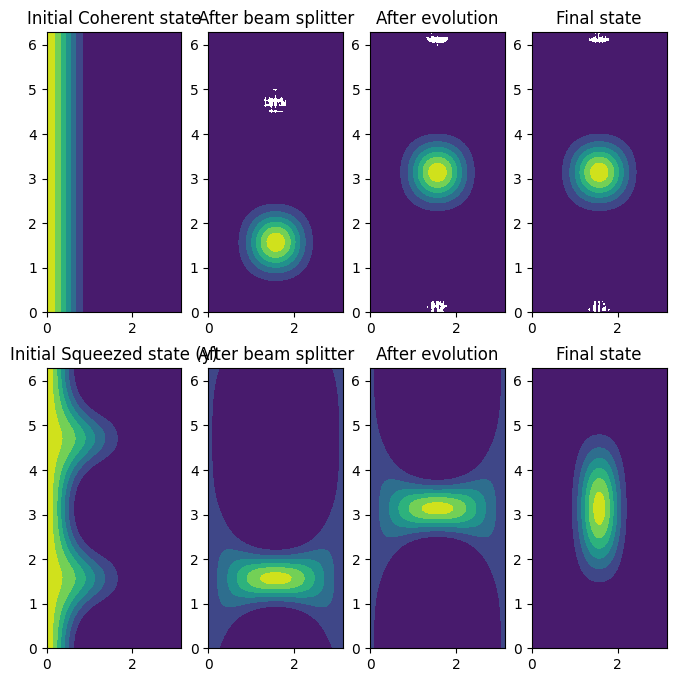

CSS. Estimated half cos: -0.00039816335536662734    SQL variance: 0.024999984146594215
Sqz. Estimated half cos: -0.000308416008880398    HL variance: 0.0050000190240869205


In [110]:
N = 10
j = 5  # Total spin quantum number
        
# Define collective spin operators
Sx = qt.jmat(j, 'x')
Sy = qt.jmat(j, 'y')
Sz = qt.jmat(j, 'z')

# Separable (SQL) Strategy
css_z = gen_css(j,0,0) #initial state in north pole
      
H_sense = Sz  # Sensing Hamiltonian
time=1.57 #for instance
beam_spl_css = (1j * np.pi/2  *Sx).expm()*css_z
evolved_css = time_evolve_state(H_sense, beam_spl_css, time)
final_css = (1j * np.pi/2  *Sx).expm()*evolved_css
        #Description of what is done in Fig 2b

expected_value_sql = qt.expect(Sz,final_css)/N
phase_var_sql = qt.variance(Sz, final_css)/N**2
#phase_variance_sql.append(phase_var_sql/N**2) 
#Since we stimate N*phase, to get the variance in theta estimation we have to divide by N**2
        
        

#HL
eigval,eigvec = Sx.eigenstates()
jm1 = eigvec[j-1]
j0 = eigvec[j]
jp1 = eigvec[j+1]
    
sss = 1/2**(1/2)*(j0-1/2**(1/2)*(jm1+jp1)) #This is the formula (283)

beam_spl_sss = (1j * np.pi/2  *Sx).expm()*sss
evolved_sss = time_evolve_state(H_sense, beam_spl_sss, time)
final_sss = (1j * np.pi/2  *Sx).expm()*evolved_sss
expected_value_hl = qt.expect(Sz,final_sss)/N
phase_var_hl = qt.variance(Sz, final_sss)/N**2

thetavec = np.linspace(0, np.pi, 100)
phivec = np.linspace(0,2*np.pi, 100)
initialcss,theta,phi = qt.spin_q_function(css_z,thetavec,phivec)
beamcss,theta1,phi1 = qt.spin_q_function(beam_spl_css,thetavec,phivec)
evolvecss,theta2,phi2 = qt.spin_q_function(evolved_css,thetavec,phivec)
finalcss,theta3,phi3 = qt.spin_q_function(final_css,thetavec,phivec)

initialsss,theta4,phi4 = qt.spin_q_function(sss,thetavec,phivec)
beamsss,theta5,phi5 = qt.spin_q_function(beam_spl_sss,thetavec,phivec)
evolvesss,theta6,phi6 = qt.spin_q_function(evolved_sss,thetavec,phivec)
finalsss,theta7,phi7 = qt.spin_q_function(final_sss,thetavec,phivec)

fig,axes = plt.subplots(2,4,figsize=(8,8))
cont0 = axes[0,0].contourf(theta,phi,initialcss)
lbl0 = axes[0,0].set_title("Initial Coherent state")

cont1 = axes[0,1].contourf(theta1, phi1,beamcss)
lbl1 = axes[0,1].set_title("After beam splitter")#

cont2 = axes[0,2].contourf(theta2, phi2,evolvecss)
lbl2 = axes[0,2].set_title("After evolution")#

cont3 = axes[0,3].contourf(theta3, phi3,finalcss)
lbl3 = axes[0,3].set_title("Final state")#

cont4 = axes[1,0].contourf(theta4,phi4,initialsss)
lbl4 = axes[1,0].set_title("Initial Squeezed state (y)")

cont5 = axes[1,1].contourf(theta5, phi5,beamsss)
lbl5 = axes[1,1].set_title("After beam splitter")#

cont6 = axes[1,2].contourf(theta6, phi6,evolvesss)
lbl6 = axes[1,2].set_title("After evolution")#

cont7 = axes[1,3].contourf(theta7, phi7,finalsss)
lbl7 = axes[1,3].set_title("Final state")#

plt.show()

print("CSS. Estimated half cos:",expected_value_sql,"   SQL variance:", phase_var_sql)
print("Sqz. Estimated half cos:",expected_value_hl,"   HL variance:", phase_var_hl)


The variance is smaller!! (But the angle better is close to pi/2)

In [91]:
Sx = qt.jmat(3,'x')
ev = Sx.eigenstates() 
print(ev[0])

[-3.00000000e+00 -2.00000000e+00 -1.00000000e+00  3.99680289e-15
  1.00000000e+00  2.00000000e+00  3.00000000e+00]


In [114]:
for j in range(1,26):
    N=2*j
    
    Sx = qt.jmat(j, 'x')
    Sy = qt.jmat(j, 'y')
    Sz = qt.jmat(j, 'z')
   
    # Separable (SQL) Strategy
    css_z = gen_css(j,0,0) #initial state in north pole
      
    H_sense = Sz  # Sensing Hamiltonian
    time=1.57 #
   
    #HL
    eigval,eigvec = Sx.eigenstates()
    jm1 = eigvec[j-1]
    j0 = eigvec[j]
    jp1 = eigvec[j+1]
    
    sss = 1/2**(1/2)*(j0-1/2**(1/2)*(jm1+jp1))
    beam_spl_sss = (1j * np.pi/2  *Sx).expm()*sss
    evolved_sss = time_evolve_state(H_sense, beam_spl_sss, time)
    final_sss = (1j * np.pi/2  *Sx).expm()*evolved_sss
    expected_value_hl = qt.expect(Sz,final_sss)/N
    phase_var_hl = qt.variance(Sz, final_sss)/N**2
    print(N, expected_value_hl, phase_var_hl, phase_var_hl*N**2)

2 -0.00039816335536699277 0.12499992073297088 0.4999996829318835
4 1.0643248238425082e-16 0.03133626431808963 0.501380229089434
6 -0.00032509901830816865 0.013888902100060357 0.5000004756021729
8 -0.00031477577094327823 0.007812517339662576 0.5000011097384048
10 -0.000308416008880398 0.0050000190240869205 0.500001902408692
12 -5.521321672650263e-17 0.0034976301271962213 0.5036587383162558
14 0.00030098320556603756 0.0025510406293440904 0.5000039633514417
16 -2.7654530787908187e-16 0.001934526122369454 0.4952386873265802
18 -0.0002967734429165581 0.0015432304272543602 0.5000066584304127
20 -0.00029528584736867236 0.0012500206094274739 0.5000082437709895
22 0.00029406312639179574 0.0010330784868711328 0.5000099876456283
24 -0.00029304029502762174 0.0008680761980109646 0.5000118900543156
26 0.00029217202557837296 0.0007396656079838217 0.5000139509970635
28 1.0016072550486504e-16 0.0006274101334371156 0.4918895446146987
30 0.0002907774017417091 0.0005555761649830374 0.5000185484847337
32 9

Variance behaves as 1/N^2

In [20]:
1/2*np.arctan(20**(-2/3))

0.06744831905307412

# 